In [1]:
import numpy as np
import pandas as pd

path = r'C:\Users\shoaib.ahmad\Desktop\power system\Stability-by-Design-Machine-Learning-Models-for-Smart-Grid-Predictions-main\smart_grid_stability.csv'
df = pd.read_csv(path)

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier


In [15]:
df.head() 



,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


In [17]:
df.isnull().sum()

tau1     0
tau2     0
tau3     0
tau4     0
p1       0
p2       0
p3       0
p4       0
g1       0
g2       0
g3       0
g4       0
stab     0
stabf    0
dtype: int64

In [ ]:
df.describe() 

In [ ]:
df.count()

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tau1    60000 non-null  float64
 1   tau2    60000 non-null  float64
 2   tau3    60000 non-null  float64
 3   tau4    60000 non-null  float64
 4   p1      60000 non-null  float64
 5   p2      60000 non-null  float64
 6   p3      60000 non-null  float64
 7   p4      60000 non-null  float64
 8   g1      60000 non-null  float64
 9   g2      60000 non-null  float64
 10  g3      60000 non-null  float64
 11  g4      60000 non-null  float64
 12  stab    60000 non-null  float64
 13  stabf   60000 non-null  object 
dtypes: float64(13), object(1)
memory usage: 6.4+ MB


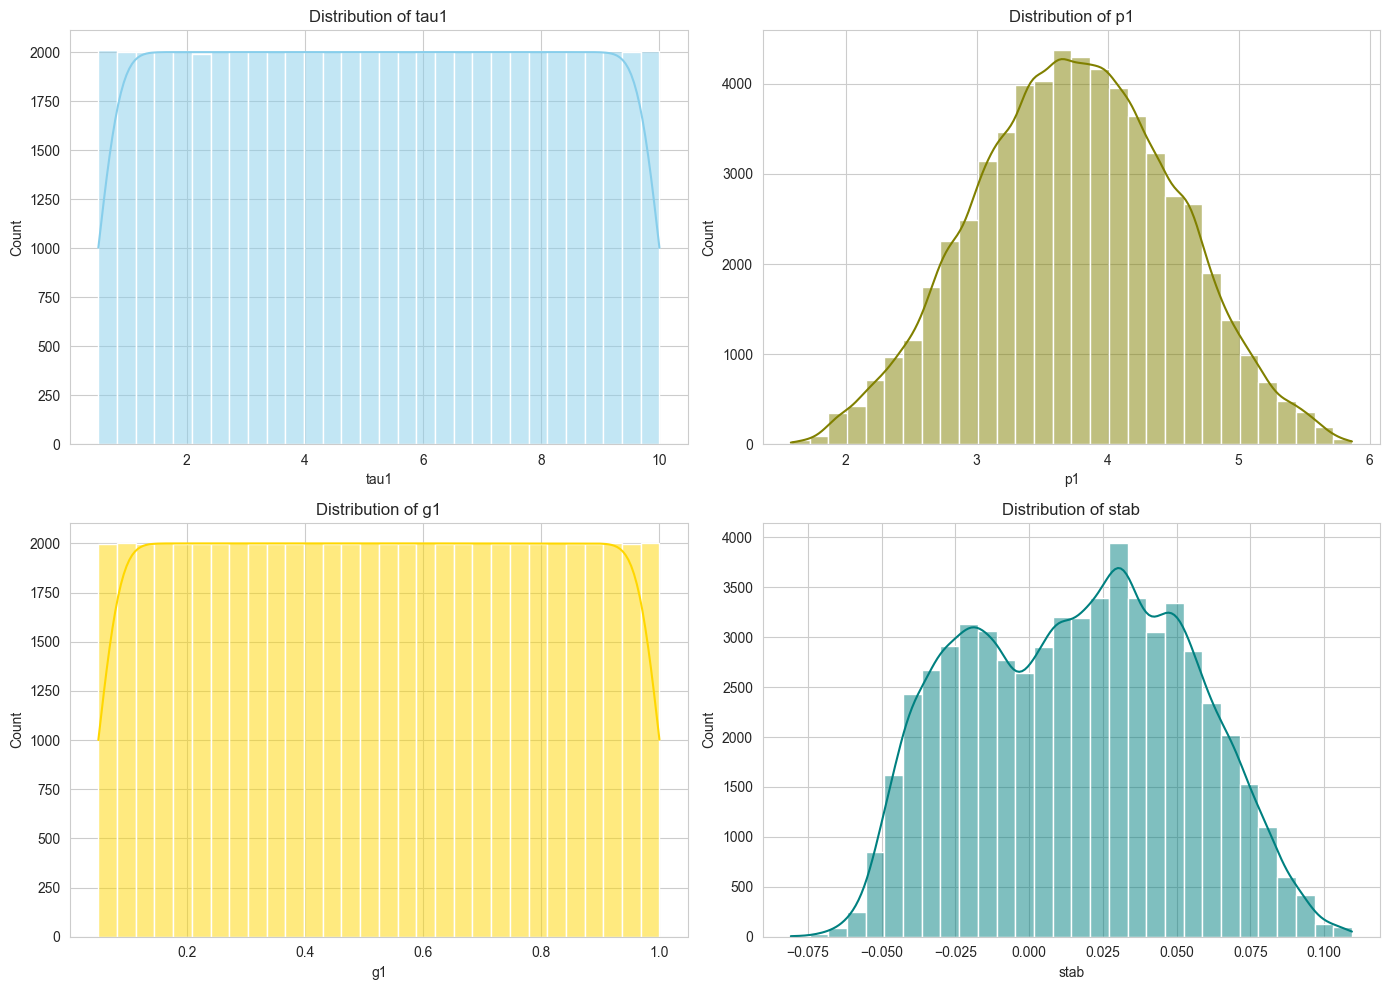

In [24]:
sns.set_style("whitegrid")

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
sns.histplot(df['tau1'], bins=30, kde=True, ax=axes[0, 0], color='skyblue')
sns.histplot(df['p1'], bins=30, kde=True, ax=axes[0, 1], color='olive')
sns.histplot(df['g1'], bins=30, kde=True, ax=axes[1, 0], color='gold')
sns.histplot(df['stab'], bins=30, kde=True, ax=axes[1, 1], color='teal')

axes[0, 0].set_title('Distribution of tau1')
axes[0, 1].set_title('Distribution of p1')
axes[1, 0].set_title('Distribution of g1')
axes[1, 1].set_title('Distribution of stab')

plt.tight_layout()
plt.show()

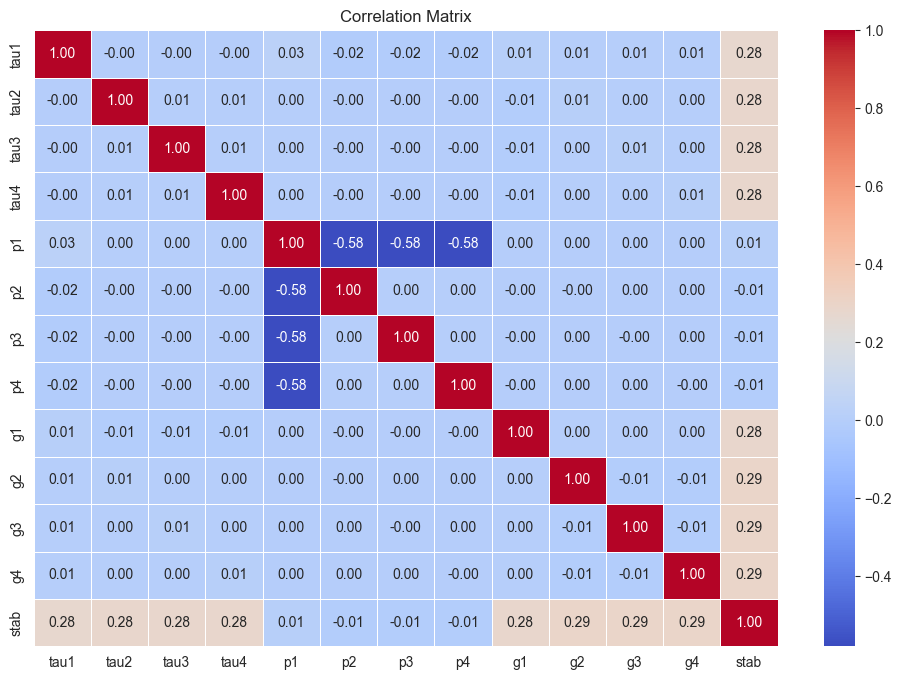

Correlation with 'stab':
 stab    1.000000
g3      0.293684
g2      0.293684
g4      0.293684
tau4    0.283417
tau2    0.283417
tau3    0.283417
g1      0.282774
tau1    0.275761
p1      0.010278
p2     -0.005951
p3     -0.005951
p4     -0.005951
Name: stab, dtype: float64


In [25]:
# Select only numeric columns for correlation analysis
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numeric_columns].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

correlation_with_stab = correlation_matrix['stab'].sort_values(ascending=False)
print("Correlation with 'stab':\n", correlation_with_stab)


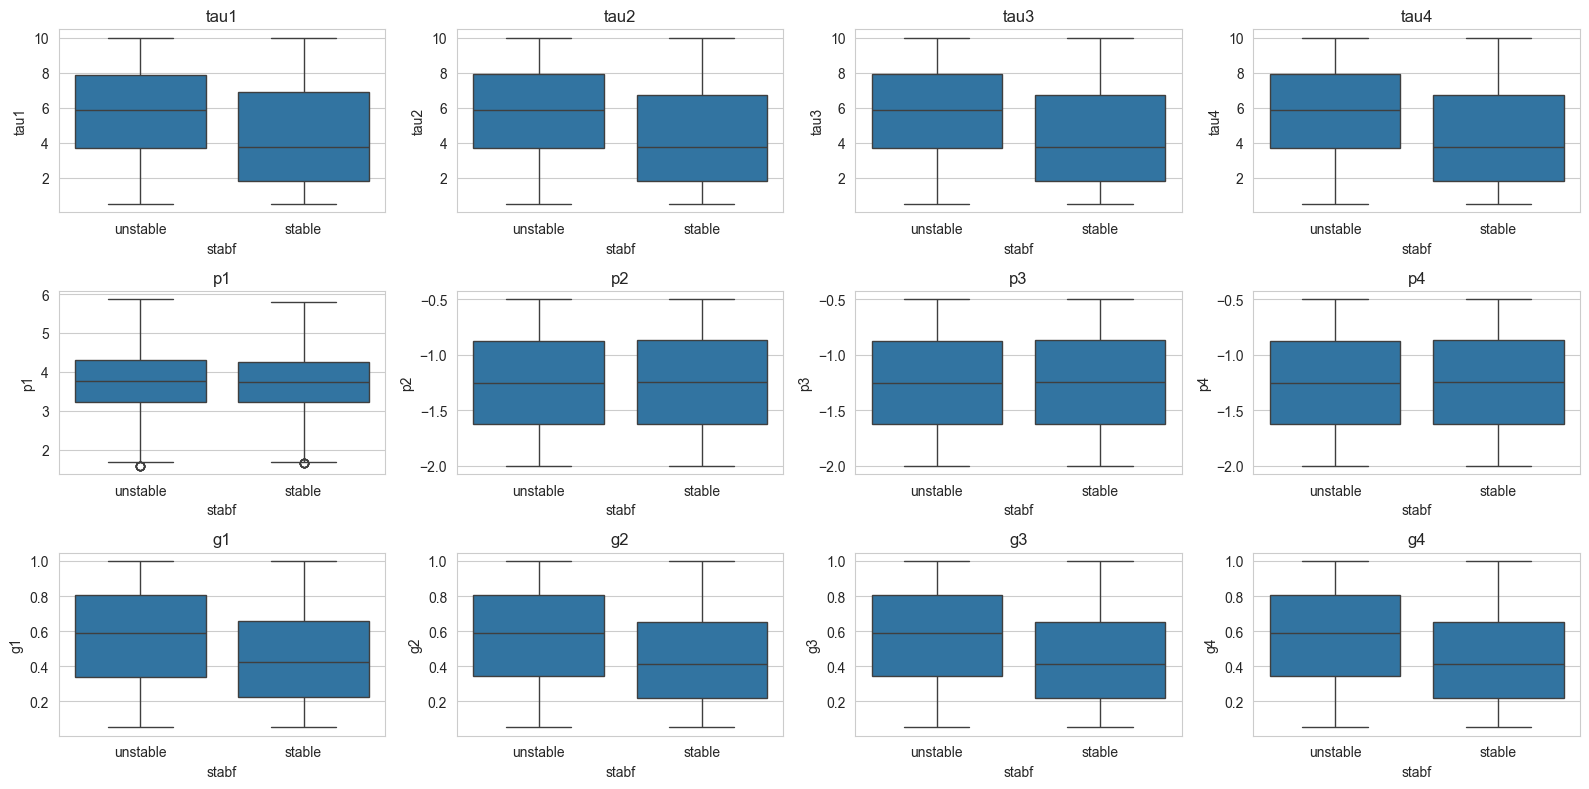

In [26]:
plt.figure(figsize=(16, 8))
for i, column in enumerate(df.columns[:-2]):
    plt.subplot(3, 4, i+1)
    sns.boxplot(x='stabf', y=column, data=df)
    plt.title(column)
plt.tight_layout()
plt.show()


In [27]:
class_distribution = df['stabf'].value_counts()

print("Class Distribution:")
print(class_distribution)

Class Distribution:
stabf
unstable    38280
stable      21720
Name: count, dtype: int64


In [28]:
# Encode the categorical target variable
le = LabelEncoder()
df['stabf_encoded'] = le.fit_transform(df['stabf'])

X = df.drop(['stabf', 'stabf_encoded', 'stab'], axis=1) 
y = df['stabf_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, target_names=le.classes_)

print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", classification_rep)


Accuracy: 0.9481

Classification Report:
               precision    recall  f1-score   support

      stable       0.94      0.92      0.93      4322
    unstable       0.95      0.97      0.96      7678

    accuracy                           0.95     12000
   macro avg       0.95      0.94      0.94     12000
weighted avg       0.95      0.95      0.95     12000



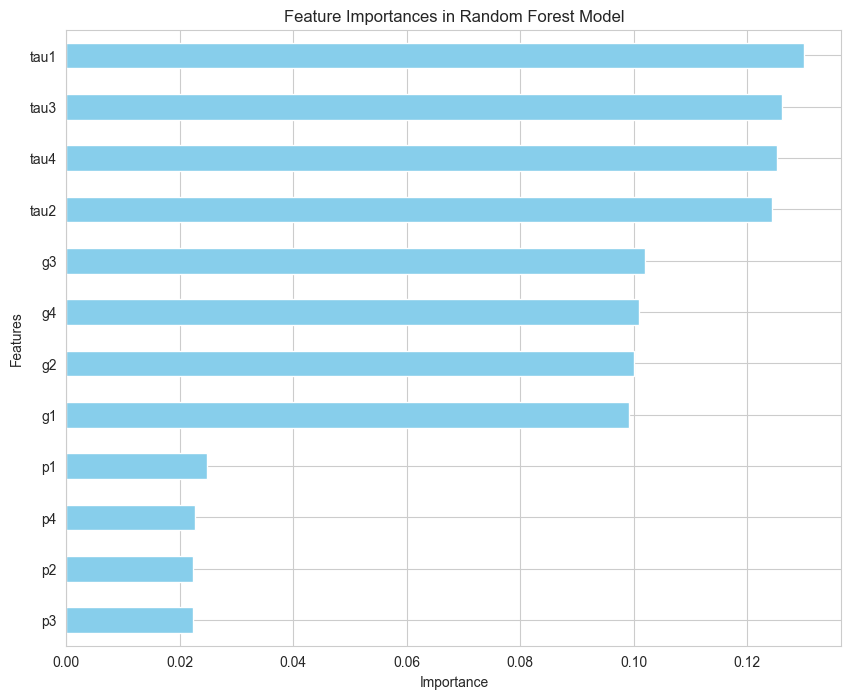

tau1    0.130099
tau3    0.126051
tau4    0.125224
tau2    0.124424
g3      0.102000
g4      0.100939
g2      0.099973
g1      0.099241
p1      0.024728
p4      0.022596
p2      0.022400
p3      0.022324
dtype: float64

In [29]:
feature_importances = rf_classifier.feature_importances_

importances_series = pd.Series(feature_importances, index=X_train.columns)

plt.figure(figsize=(10, 8))
importances_series.sort_values().plot(kind='barh', color='skyblue')
plt.title('Feature Importances in Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

importances_series.sort_values(ascending=False)


In [30]:
dt_classifier = DecisionTreeClassifier(random_state=42)

dt_classifier.fit(X_train, y_train)

y_pred_dt = dt_classifier.predict(X_test)

accuracy_dt = accuracy_score(y_test, y_pred_dt)
classification_rep_dt = classification_report(y_test, y_pred_dt, target_names=le.classes_)

print(f"Accuracy: {accuracy_dt:.4f}")
print("\nClassification Report:\n", classification_rep_dt)

Accuracy: 0.8958

Classification Report:
               precision    recall  f1-score   support

      stable       0.85      0.86      0.86      4322
    unstable       0.92      0.92      0.92      7678

    accuracy                           0.90     12000
   macro avg       0.89      0.89      0.89     12000
weighted avg       0.90      0.90      0.90     12000



In [31]:
svm_classifier = SVC(kernel='linear', random_state=42)

svm_classifier.fit(X_train, y_train)

y_pred_svm = svm_classifier.predict(X_test)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
classification_rep_svm = classification_report(y_test, y_pred_svm, target_names=le.classes_)
 
print(f"Accuracy: {accuracy_svm:.4f}")
print("\nClassification Report:\n", classification_rep_svm)

Accuracy: 0.8111

Classification Report:
               precision    recall  f1-score   support

      stable       0.76      0.69      0.73      4322
    unstable       0.84      0.88      0.86      7678

    accuracy                           0.81     12000
   macro avg       0.80      0.79      0.79     12000
weighted avg       0.81      0.81      0.81     12000



In [32]:
from xgboost import XGBClassifier


xgb_classifier = XGBClassifier(random_state=42)
xgb_classifier.fit(X_train, y_train)
y_pred_xgb = xgb_classifier.predict(X_test)

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
classification_rep_xgb = classification_report(y_test, y_pred_xgb, target_names=le.classes_)

print(f"Accuracy: {accuracy_xgb:.4f}")
print("\nClassification Report:\n", classification_rep_xgb)


Accuracy: 0.9792

Classification Report:
               precision    recall  f1-score   support

      stable       0.98      0.97      0.97      4322
    unstable       0.98      0.99      0.98      7678

    accuracy                           0.98     12000
   macro avg       0.98      0.98      0.98     12000
weighted avg       0.98      0.98      0.98     12000



In [ ]:
print("Random Forest Classifier Report:")
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", classification_rep)

print("\nDecision Tree Classifier Report:")
print(f"Accuracy: {accuracy_dt:.4f}")
print("\nClassification Report:\n", classification_rep_dt)

print("\nSupport Vector Machine Classifier Report:")
print(f"Accuracy: {accuracy_svm:.4f}")
print("\nClassification Report:\n", classification_rep_svm)

print("\nXGBoost Classifier Report:")
print(f"Accuracy: {accuracy_xgb:.4f}")
print("\nClassification Report:\n", classification_rep_xgb)